<a href="https://colab.research.google.com/github/Tharun1823/Lumber-Spine-Degenerative-classification/blob/main/DL_project_Lumbar_Spine_Degenerative_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


Kaggle credentials set.
Kaggle credentials successfully validated.


In [ ]:
!pip install -U kagglehub

In [ ]:
import kagglehub

# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
kagglehub.login()

# Download dataset
dataset_path = kagglehub.competition_download("rsna-2024-lumbar-spine-degenerative-classification")

print("✅ Dataset downloaded and extracted to:", dataset_path)

100%|██████████| 28.2G/28.2G [13:30<00:00, 37.4MB/s]

Extracting files...


✅ Dataset downloaded and extracted to: /root/.cache/kagglehub/competitions/rsna-2024-lumbar-spine-degenerative-classification


In [ ]:
import os

for dirname, _, filenames in os.walk(dataset_path):
    print(f"📂 {dirname}")
    for filename in filenames[:10]:  # print only first 10 files
        print("   ", filename)


Streaming output truncated to the last 5000 lines.
    15.dcm
    7.dcm
    10.dcm
📂 /root/.cache/kagglehub/competitions/rsna-2024-lumbar-spine-degenerative-classification/train_images/3587842489/1838664921
    2.dcm
    1.dcm
    8.dcm
    11.dcm
    9.dcm
    3.dcm
    15.dcm
    7.dcm
    10.dcm
    13.dcm
📂 /root/.cache/kagglehub/competitions/rsna-2024-lumbar-spine-degenerative-classification/train_images/4020499186
📂 /root/.cache/kagglehub/competitions/rsna-2024-lumbar-spine-degenerative-classification/train_images/4020499186/66324554
    17.dcm
    2.dcm
    1.dcm
    8.dcm
    11.dcm
    9.dcm
    3.dcm
    15.dcm
    7.dcm
    10.dcm
📂 /root/.cache/kagglehub/competitions/rsna-2024-lumbar-spine-degenerative-classification/train_images/4020499186/2167430227
    44.dcm
    17.dcm
    43.dcm
    2.dcm
    34.dcm
    41.dcm
    54.dcm
    1.dcm
    24.dcm
    8.dcm
📂 /root/.cache/kagglehub/competitions/rsna-2024-lumbar-spine-degenerative-classification/train_images/4020499186/388967

In [ ]:
import os
import numpy as np  # linear algebra
import pandas as pd  # data processing
import kagglehub

# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
kagglehub.login()

# Download the competition dataset
dataset_path = kagglehub.competition_download(
    "rsna-2024-lumbar-spine-degenerative-classification"
)

print("✅ Dataset available at:", dataset_path)

# 3. Walk through dataset directory and print first 10 files
import os
for dirname, _, filenames in os.walk(dataset_path):
    for filename in filenames[:10]:
        print(os.path.join(dirname, filename))

Streaming output truncated to the last 5000 lines.
/root/.cache/kagglehub/competitions/rsna-2024-lumbar-spine-degenerative-classification/train_images/1782095928/3350661070/15.dcm
/root/.cache/kagglehub/competitions/rsna-2024-lumbar-spine-degenerative-classification/train_images/1782095928/3350661070/7.dcm
/root/.cache/kagglehub/competitions/rsna-2024-lumbar-spine-degenerative-classification/train_images/1782095928/3350661070/10.dcm
/root/.cache/kagglehub/competitions/rsna-2024-lumbar-spine-degenerative-classification/train_images/1782095928/2236558816/17.dcm
/root/.cache/kagglehub/competitions/rsna-2024-lumbar-spine-degenerative-classification/train_images/1782095928/2236558816/2.dcm
/root/.cache/kagglehub/competitions/rsna-2024-lumbar-spine-degenerative-classification/train_images/1782095928/2236558816/1.dcm
/root/.cache/kagglehub/competitions/rsna-2024-lumbar-spine-degenerative-classification/train_images/1782095928/2236558816/8.dcm
/root/.cache/kagglehub/competitions/rsna-2024-lumb

In [ ]:
import os
import kagglehub

# Download dataset (unzips automatically)
base_dir = kagglehub.competition_download("rsna-2024-lumbar-spine-degenerative-classification")

# Now list files
print(os.listdir(base_dir))


['train.csv', 'train_label_coordinates.csv', 'test_images', 'train_images', 'test_series_descriptions.csv', 'train_series_descriptions.csv', 'sample_submission.csv']


In [ ]:
!pip install pydicom

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 57.8 MB/s eta 0:00:00


In [ ]:
import seaborn as sns

import matplotlib.pyplot as plt
import os
import time
import numpy as np
import glob
import json
import collections
import torch
import torch.nn as nn

import pydicom as dicom
import matplotlib.patches as patches

from matplotlib import animation, rc
import pandas as pd

import pydicom as dicom # dicom
import pydicom
from pydicom.pixel_data_handlers.util import apply_voi_lut

In [ ]:
import pandas as pd
import os
import kagglehub

# Download dataset (unzips automatically if not already present)
base_dir = kagglehub.competition_download("rsna-2024-lumbar-spine-degenerative-classification")

# Load CSVs from the dataset folder
train = pd.read_csv(os.path.join(base_dir, "train.csv"))
label = pd.read_csv(os.path.join(base_dir, "train_label_coordinates.csv"))
train_desc = pd.read_csv(os.path.join(base_dir, "train_series_descriptions.csv"))
test_desc = pd.read_csv(os.path.join(base_dir, "test_series_descriptions.csv"))

# Preview
print(train.head())
print(label.head())


   study_id spinal_canal_stenosis_l1_l2 spinal_canal_stenosis_l2_l3  \
0   4003253                 Normal/Mild                 Normal/Mild   
1   4646740                 Normal/Mild                 Normal/Mild   
2   7143189                 Normal/Mild                 Normal/Mild   
3   8785691                 Normal/Mild                 Normal/Mild   
4  10728036                 Normal/Mild                 Normal/Mild   

  spinal_canal_stenosis_l3_l4 spinal_canal_stenosis_l4_l5  \
0                 Normal/Mild                 Normal/Mild   
1                    Moderate                      Severe   
2                 Normal/Mild                 Normal/Mild   
3                 Normal/Mild                 Normal/Mild   
4                 Normal/Mild                 Normal/Mild   

  spinal_canal_stenosis_l5_s1 left_neural_foraminal_narrowing_l1_l2  \
0                 Normal/Mild                           Normal/Mild   
1                 Normal/Mild                           Normal/M

In [ ]:
test_desc.head(5)

,study_id,series_id,series_description
0,44036939,2828203845,Sagittal T1
1,44036939,3481971518,Axial T2
2,44036939,3844393089,Sagittal T2/STIR


In [ ]:
# Function to generate image paths based on directory structure
def generate_image_paths(df, data_dir):
    image_paths = []
    for study_id, series_id in zip(df['study_id'], df['series_id']):
        study_dir = os.path.join(data_dir, str(study_id))
        series_dir = os.path.join(study_dir, str(series_id))

        if os.path.exists(series_dir):  # ✅ avoid errors if directory is missing
            images = os.listdir(series_dir)
            image_paths.extend([os.path.join(series_dir, img) for img in images])
    return image_paths


In [ ]:
# Generate image paths for train and test data
train_image_paths = generate_image_paths(train_desc, os.path.join(base_dir, "train_images"))
test_image_paths  = generate_image_paths(test_desc, os.path.join(base_dir, "test_images"))

print(len(train_image_paths), "train images found")
print(len(test_image_paths), "test images found")

147218 train images found
97 test images found


In [ ]:
print(train_image_paths[2])

/root/.cache/kagglehub/competitions/rsna-2024-lumbar-spine-degenerative-classification/train_images/4003253/702807833/8.dcm


In [ ]:
len(train_desc)

6294

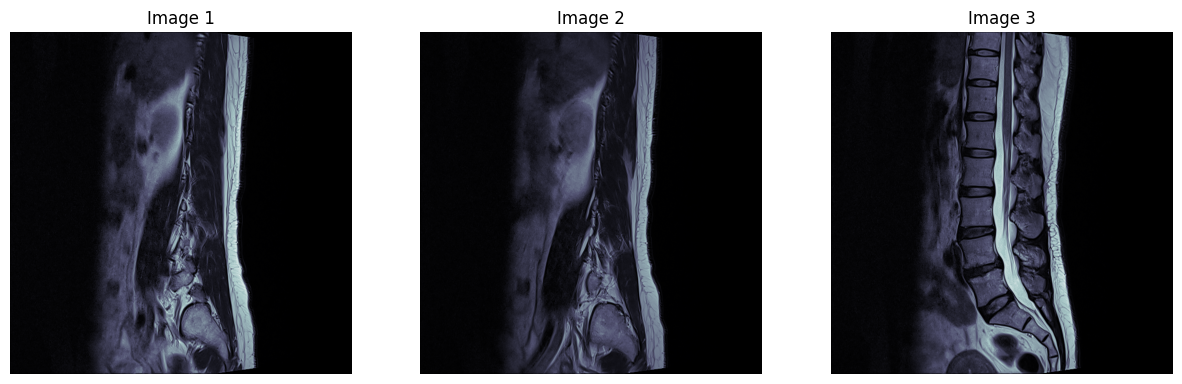

In [ ]:
import pydicom
import matplotlib.pyplot as plt

# Function to open and display DICOM images
def display_dicom_images(image_paths):
    plt.figure(figsize=(15, 5))  # Adjust figure size if needed
    for i, path in enumerate(image_paths[:3]):
        ds = pydicom.dcmread(path)
        plt.subplot(1, 3, i+1)
        plt.imshow(ds.pixel_array, cmap=plt.cm.bone)
        plt.title(f"Image {i+1}")
        plt.axis('off')
    plt.show()

# Display the first three DICOM images
display_dicom_images(train_image_paths)

In [ ]:
import os
import pydicom
import matplotlib.pyplot as plt
import pandas as pd

# Function to open and display DICOM images along with coordinates
def display_dicom_with_coordinates(image_paths, label_df):
    fig, axs = plt.subplots(1, len(image_paths), figsize=(18, 6))

    for idx, path in enumerate(image_paths):  # Display images
        study_id = int(path.split('/')[-3])
        series_id = int(path.split('/')[-2])

        # Filter label coordinates for the current study and series
        filtered_labels = label_df[(label_df['study_id'] == study_id) & (label_df['series_id'] == series_id)]

        # Read DICOM image
        ds = pydicom.dcmread(path)

        # Plot DICOM image
        axs[idx].imshow(ds.pixel_array, cmap='gray')
        axs[idx].set_title(f"Study ID: {study_id}, Series ID: {series_id}")
        axs[idx].axis('off')

        # Plot coordinates
        for _, row in filtered_labels.iterrows():
            axs[idx].plot(row['x'], row['y'], 'ro', markersize=5)

    plt.tight_layout()
    plt.show()

In [ ]:
# Load DICOM files from a folder
def load_dicom_files(path_to_folder):
    files = [os.path.join(path_to_folder, f) for f in os.listdir(path_to_folder) if f.endswith('.dcm')]
    files.sort(key=lambda x: int(os.path.splitext(os.path.basename(x))[0].split('-')[-1]))
    return files

# Example Study ID
study_id = "100206310"

# ✅ Use base_dir instead of /kaggle/input
study_folder = os.path.join(base_dir, "train_images", study_id)

image_paths = []
for series_folder in os.listdir(study_folder):
    series_folder_path = os.path.join(study_folder, series_folder)
    dicom_files = load_dicom_files(series_folder_path)
    if dicom_files:
        image_paths.append(dicom_files[0])  # First image from each series

# Now display with labels
display_dicom_with_coordinates(image_paths, label)

In [ ]:
# Drop non-condition columns
id_vars = ['study_id', 'series_id', 'instance_number', 'x', 'y', 'series_description']
value_vars = [col for col in train.columns if col not in id_vars]

# Melt the dataframe (wide → long)
melted = train.melt(id_vars=['study_id'], value_vars=value_vars,
                    var_name='condition_level', value_name='severity')

# Split condition and level properly
melted['parts'] = melted['condition_level'].str.split('_')

# Condition = everything except last two parts
melted['condition'] = melted['parts'].apply(lambda x: ' '.join(x[:-2]).replace('_', ' ').title())

# Level = last two parts (e.g. l1_l2 → L1/L2)
melted['level'] = melted['parts'].apply(lambda x: x[-2].capitalize() + '/' + x[-1].capitalize())

# Final reshaped dataframe
new_train_df = melted[['study_id', 'condition', 'level', 'severity']]

print(new_train_df.head())

   study_id              condition  level     severity
0   4003253  Spinal Canal Stenosis  L1/L2  Normal/Mild
1   4646740  Spinal Canal Stenosis  L1/L2  Normal/Mild
2   7143189  Spinal Canal Stenosis  L1/L2  Normal/Mild
3   8785691  Spinal Canal Stenosis  L1/L2  Normal/Mild
4  10728036  Spinal Canal Stenosis  L1/L2  Normal/Mild


In [ ]:
# Print columns in a neat way
print("\nColumns in new_train_df:")
print(",".join(new_train_df.columns))

print("\nColumns in label:")
print(",".join(label.columns))

print("\nColumns in test_desc:")
print(",".join(test_desc.columns))


Columns in new_train_df:
study_id,condition,level,severity

Columns in label:
study_id,series_id,instance_number,condition,level,x,y

Columns in test_desc:
study_id,series_id,series_description


In [ ]:
# Merge label with new_train_df on common columns
merged_df = pd.merge(label, new_train_df, on=['study_id', 'condition', 'level'], how='inner')

# Merge the result with train_desc on study_id and series_id
final_merged_df = pd.merge(merged_df, train_desc, on=['study_id', 'series_id'], how='inner')

# Display the first few rows of the final merged dataframe
final_merged_df.head(5)

,study_id,series_id,instance_number,condition,level,x,y,severity,series_description
0,4003253,702807833,8,Spinal Canal Stenosis,L1/L2,322.831858,227.964602,Normal/Mild,Sagittal T2/STIR
1,4003253,702807833,8,Spinal Canal Stenosis,L2/L3,320.571429,295.714286,Normal/Mild,Sagittal T2/STIR
2,4003253,702807833,8,Spinal Canal Stenosis,L3/L4,323.030303,371.818182,Normal/Mild,Sagittal T2/STIR
3,4003253,702807833,8,Spinal Canal Stenosis,L4/L5,335.292035,427.327434,Normal/Mild,Sagittal T2/STIR
4,4003253,702807833,8,Spinal Canal Stenosis,L5/S1,353.415929,483.964602,Normal/Mild,Sagittal T2/STIR


In [ ]:
final_merged_df[final_merged_df['study_id'] == 100206310].sort_values(['x','y'],ascending = True)

,study_id,series_id,instance_number,condition,level,x,y,severity,series_description
1121,100206310,1012284084,55,Right Subarticular Stenosis,L5/S1,145.120536,159.428571,Moderate,Axial T2
1113,100206310,1012284084,20,Right Subarticular Stenosis,L1/L2,145.120536,162.285714,Normal/Mild,Axial T2
1115,100206310,1012284084,28,Right Subarticular Stenosis,L2/L3,145.691964,160.000000,Normal/Mild,Axial T2
1119,100206310,1012284084,46,Right Subarticular Stenosis,L4/L5,146.263393,160.000000,Moderate,Axial T2
1117,100206310,1012284084,37,Right Subarticular Stenosis,L3/L4,147.406250,161.142857,Moderate,Axial T2
1120,100206310,1012284084,55,Left Subarticular Stenosis,L5/S1,167.660739,157.154583,Moderate,Axial T2
1118,100206310,1012284084,46,Left Subarticular Stenosis,L4/L5,168.536252,156.279070,Severe,Axial T2
1116,100206310,1012284084,37,Left Subarticular Stenosis,L3/L4,173.351573,158.467852,Moderate,Axial T2
1114,100206310,1012284084,28,Left Subarticular Stenosis,L2/L3,177.729138,160.218878,Normal/Mild,Axial T2
1112,100206310,1012284084,20,Left Subarticular Stenosis,L1/L2,180.355677,165.034200,Normal/Mild,Axial T2


In [ ]:
final_merged_df[final_merged_df['series_id'] == 1012284084].sort_values("instance_number")

,study_id,series_id,instance_number,condition,level,x,y,severity,series_description
1112,100206310,1012284084,20,Left Subarticular Stenosis,L1/L2,180.355677,165.034200,Normal/Mild,Axial T2
1113,100206310,1012284084,20,Right Subarticular Stenosis,L1/L2,145.120536,162.285714,Normal/Mild,Axial T2
1114,100206310,1012284084,28,Left Subarticular Stenosis,L2/L3,177.729138,160.218878,Normal/Mild,Axial T2
1115,100206310,1012284084,28,Right Subarticular Stenosis,L2/L3,145.691964,160.000000,Normal/Mild,Axial T2
1116,100206310,1012284084,37,Left Subarticular Stenosis,L3/L4,173.351573,158.467852,Moderate,Axial T2
1117,100206310,1012284084,37,Right Subarticular Stenosis,L3/L4,147.406250,161.142857,Moderate,Axial T2
1118,100206310,1012284084,46,Left Subarticular Stenosis,L4/L5,168.536252,156.279070,Severe,Axial T2
1119,100206310,1012284084,46,Right Subarticular Stenosis,L4/L5,146.263393,160.000000,Moderate,Axial T2
1120,100206310,1012284084,55,Left Subarticular Stenosis,L5/S1,167.660739,157.154583,Moderate,Axial T2
1121,100206310,1012284084,55,Right Subarticular Stenosis,L5/S1,145.120536,159.428571,Moderate,Axial T2


In [ ]:
# Filter the dataframe for the given study_id and sort by instance_number
filtered_df = final_merged_df[final_merged_df['study_id'] == 1013589491].sort_values("instance_number")
# Sort final_merged_df by study_id, series_id, and series_description
sorted_final_merged_df = final_merged_df[final_merged_df['study_id'] == 1013589491].sort_values(by=['series_id', 'series_description', 'instance_number'])
sorted_final_merged_df

,study_id,series_id,instance_number,condition,level,x,y,severity,series_description
11421,1013589491,482346415,10,Spinal Canal Stenosis,L1/L2,245.476038,189.689334,Normal/Mild,Sagittal T2/STIR
11422,1013589491,482346415,10,Spinal Canal Stenosis,L2/L3,235.251580,250.434645,Normal/Mild,Sagittal T2/STIR
11423,1013589491,482346415,10,Spinal Canal Stenosis,L3/L4,232.381129,310.201597,Moderate,Sagittal T2/STIR
11424,1013589491,482346415,10,Spinal Canal Stenosis,L4/L5,238.435979,366.511699,Moderate,Sagittal T2/STIR
11425,1013589491,482346415,10,Spinal Canal Stenosis,L5/S1,257.921341,421.652869,Normal/Mild,Sagittal T2/STIR
11426,1013589491,598943280,7,Left Subarticular Stenosis,L5/S1,277.947591,296.033812,Normal/Mild,Axial T2
11427,1013589491,598943280,7,Right Subarticular Stenosis,L5/S1,231.484002,293.409742,Normal/Mild,Axial T2
11428,1013589491,598943280,13,Left Subarticular Stenosis,L4/L5,266.694844,257.081995,Moderate,Axial T2
11429,1013589491,598943280,13,Right Subarticular Stenosis,L4/L5,228.060888,255.755492,Normal/Mild,Axial T2
11430,1013589491,598943280,19,Left Subarticular Stenosis,L3/L4,262.366864,246.262046,Moderate,Axial T2


In [ ]:
import os
import pandas as pd

# ✅ Use the kagglehub path, not a hardcoded string
# base_dir was already defined as:
# base_dir = kagglehub.competition_download("rsna-2024-lumbar-spine-degenerative-classification")

# Create the row_id column
final_merged_df['row_id'] = (
    final_merged_df['study_id'].astype(str) + '_' +
    final_merged_df['condition'].str.lower().str.replace(' ', '_') + '_' +
    final_merged_df['level'].str.lower().str.replace('/', '_')
)

# ✅ Create the image_path column (Colab-compatible)
final_merged_df['image_path'] = (
    final_merged_df.apply(
        lambda row: os.path.join(
            base_dir,
            "train_images",
            str(row['study_id']),
            str(row['series_id']),
            f"{row['instance_number']}.dcm"
        ),
        axis=1
    )
)

# Display the updated dataframe
final_merged_df.head(5)


,study_id,series_id,instance_number,condition,level,x,y,severity,series_description,row_id,image_path
0,4003253,702807833,8,Spinal Canal Stenosis,L1/L2,322.831858,227.964602,Normal/Mild,Sagittal T2/STIR,4003253_spinal_canal_stenosis_l1_l2,/root/.cache/kagglehub/competitions/rsna-2024-...
1,4003253,702807833,8,Spinal Canal Stenosis,L2/L3,320.571429,295.714286,Normal/Mild,Sagittal T2/STIR,4003253_spinal_canal_stenosis_l2_l3,/root/.cache/kagglehub/competitions/rsna-2024-...
2,4003253,702807833,8,Spinal Canal Stenosis,L3/L4,323.030303,371.818182,Normal/Mild,Sagittal T2/STIR,4003253_spinal_canal_stenosis_l3_l4,/root/.cache/kagglehub/competitions/rsna-2024-...
3,4003253,702807833,8,Spinal Canal Stenosis,L4/L5,335.292035,427.327434,Normal/Mild,Sagittal T2/STIR,4003253_spinal_canal_stenosis_l4_l5,/root/.cache/kagglehub/competitions/rsna-2024-...
4,4003253,702807833,8,Spinal Canal Stenosis,L5/S1,353.415929,483.964602,Normal/Mild,Sagittal T2/STIR,4003253_spinal_canal_stenosis_l5_s1,/root/.cache/kagglehub/competitions/rsna-2024-...


In [ ]:
final_merged_df[final_merged_df["severity"] == "Normal/Mild"].value_counts().sum()

np.int64(37626)

In [ ]:
final_merged_df[final_merged_df["severity"] == "Moderate"].value_counts().sum()

np.int64(7950)

In [ ]:
final_merged_df[final_merged_df["severity"] == "Severe"].value_counts().sum()

np.int64(3081)

In [ ]:
# Define the base path for test images (✅ Kaggle path)
base_path = '/kaggle/input/rsna-2024-lumbar-spine-degenerative-classification/test_images'

In [ ]:
# Function to get sorted .dcm image paths for a series
def get_image_paths(row):
    series_path = os.path.join(base_path, str(row['study_id']), str(row['series_id']))
    if os.path.exists(series_path):
        files = [
            os.path.join(series_path, f)
            for f in os.listdir(series_path)
            if f.endswith(".dcm")
        ]
        # sort by instance number if filenames follow pattern "###.dcm"
        files.sort(key=lambda x: int(os.path.splitext(os.path.basename(x))[0]))
        return files
    return []


In [ ]:
# Mapping of series_description to conditions
condition_mapping = {
    'Sagittal T1': {'left': 'left_neural_foraminal_narrowing', 'right': 'right_neural_foraminal_narrowing'},
    'Axial T2': {'left': 'left_subarticular_stenosis', 'right': 'right_subarticular_stenosis'},
    'Sagittal T2/STIR': 'spinal_canal_stenosis'
}

In [ ]:
# Create a list to store the expanded rows
expanded_rows = []

# Expand the dataframe by adding new rows for each file path
for index, row in test_desc.iterrows():
    image_paths = get_image_paths(row)
    conditions = condition_mapping.get(row['series_description'], {})
    if isinstance(conditions, str):  # Single condition
        conditions = {'left': conditions, 'right': conditions}
    for side, condition in conditions.items():
        for image_path in image_paths:
            expanded_rows.append({
                'study_id': row['study_id'],
                'series_id': row['series_id'],
                'series_description': row['series_description'],
                'image_path': image_path,
                'condition': condition,
                'row_id': f"{row['study_id']}_{condition}"
            })

In [ ]:
# Create a new dataframe from the expanded rows
expanded_test_desc = pd.DataFrame(expanded_rows)

In [ ]:
# Display the resulting dataframe
expanded_test_desc.head(5)

""


In [ ]:
# change severity column labels
#Normal/Mild': 'normal_mild', 'Moderate': 'moderate', 'Severe': 'severe'}
final_merged_df['severity'] = final_merged_df['severity'].map({'Normal/Mild': 'normal_mild', 'Moderate': 'moderate', 'Severe': 'severe'})

In [ ]:
# change severity column labels
#Normal/Mild': 'normal_mild', 'Moderate': 'moderate', 'Severe': 'severe'}
final_merged_df['severity'] = final_merged_df['severity'].str.lower().str.strip().map({'normal/mild': 'normal_mild', 'moderate': 'moderate', 'severe': 'severe'})

In [ ]:
import os
import pandas as pd # Import pandas

# Re-initialize train_data from final_merged_df
train_data = final_merged_df.copy()

# Base path depending on Kaggle dataset mount
BASE_PATH = base_dir

# Define a function to check if a path exists
def check_exists(path):
    return os.path.exists(path)

# Define a function to check if a study ID directory exists
def check_study_id(row):
    study_id = row['study_id']
    path = os.path.join(BASE_PATH, "train_images", str(study_id))
    return check_exists(path)

# Define a function to check if a series ID directory exists
def check_series_id(row):
    study_id = row['study_id']
    series_id = row['series_id']
    path = os.path.join(BASE_PATH, "train_images", str(study_id), str(series_id))
    return check_exists(path)

# Define a function to check if an image file exists
def check_image_exists(row):
    image_path = row['image_path']
    return check_exists(image_path)

# Apply the functions to the train_data dataframe
train_data['study_id_exists'] = train_data.apply(check_study_id, axis=1)
train_data['series_id_exists'] = train_data.apply(check_series_id, axis=1)
train_data['image_exists'] = train_data.apply(check_image_exists, axis=1)

# Filter train_data
train_data = train_data[
    (train_data['study_id_exists']) &
    (train_data['series_id_exists']) &
    (train_data['image_exists'])
]

In [ ]:
train_data.shape

(48692, 14)

In [ ]:
train_data.head(3)

,study_id,series_id,instance_number,condition,level,x,y,severity,series_description,row_id,image_path,study_id_exists,series_id_exists,image_exists
0,4003253,702807833,8,Spinal Canal Stenosis,L1/L2,322.831858,227.964602,NaN,Sagittal T2/STIR,4003253_spinal_canal_stenosis_l1_l2,/root/.cache/kagglehub/competitions/rsna-2024-...,True,True,True
1,4003253,702807833,8,Spinal Canal Stenosis,L2/L3,320.571429,295.714286,NaN,Sagittal T2/STIR,4003253_spinal_canal_stenosis_l2_l3,/root/.cache/kagglehub/competitions/rsna-2024-...,True,True,True
2,4003253,702807833,8,Spinal Canal Stenosis,L3/L4,323.030303,371.818182,NaN,Sagittal T2/STIR,4003253_spinal_canal_stenosis_l3_l4,/root/.cache/kagglehub/competitions/rsna-2024-...,True,True,True


In [ ]:
def load_dicom(path):
    dicom = pydicom.read_file(path)
    data = dicom.pixel_array
    data = data - np.min(data)
    if np.max(data) != 0:
        data = data / np.max(data)
    data = (data * 255).astype(np.uint8)
    return data

Let's check the distribution of severity labels and series descriptions in the `train_data` DataFrame to understand the class distribution.

In [ ]:
print("Value counts for 'severity' in train_data:")
print(train_data['severity'].value_counts(dropna=False))

print("\nValue counts for 'series_description' in train_data:")
print(train_data['series_description'].value_counts(dropna=False))

print("\nValue counts for 'severity' and 'series_description' combined in train_data:")
print(train_data.groupby('series_description')['severity'].value_counts(dropna=False))

Value counts for 'severity' in train_data:
severity
NaN         37661
moderate     7950
severe       3081
Name: count, dtype: int64

Value counts for 'series_description' in train_data:
series_description
Sagittal T1         19724
Axial T2            19220
Sagittal T2/STIR     9748
Name: count, dtype: int64

Value counts for 'severity' and 'series_description' combined in train_data:
series_description  severity
Axial T2            NaN         13724
                    moderate     3659
                    severe       1837
Sagittal T1         NaN         15388
                    moderate     3560
                    severe        776
Sagittal T2/STIR    NaN          8549
                    moderate      731
                    severe        468
Name: count, dtype: int64


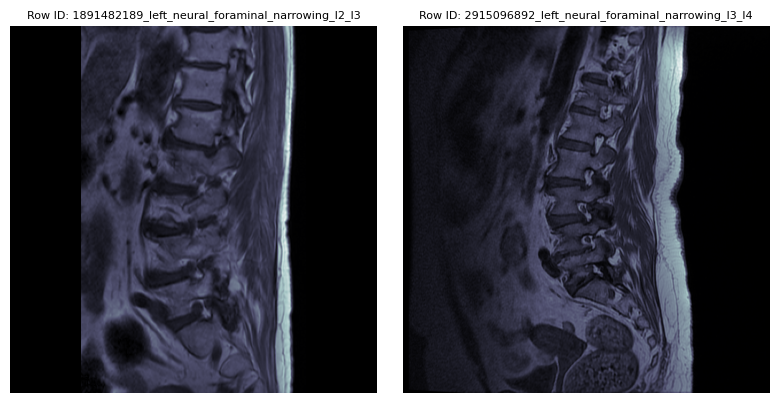

In [ ]:
import random
import pydicom
import matplotlib.pyplot as plt

# Function to load a DICOM file
def load_dicom(path):
    ds = pydicom.dcmread(path)
    return ds.pixel_array

# Randomly select 2 images
images = []
row_ids = []
selected_indices = random.sample(range(len(final_merged_df)), 2)  # Randomly select two indices
for i in selected_indices:
    image = load_dicom(final_merged_df.iloc[i]['image_path'])  # Corrected indexing
    images.append(image)
    row_ids.append(final_merged_df.iloc[i]['row_id'])  # Access row_id properly

# Plot images
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
for i in range(2):
    ax[i].imshow(images[i], cmap='bone')  # 'bone' is nice for medical imaging
    ax[i].set_title(f'Row ID: {row_ids[i]}', fontsize=8)
    ax[i].axis('off')
plt.tight_layout()
plt.show()


In [ ]:
train_data

,study_id,series_id,instance_number,condition,level,x,y,severity,series_description,row_id,image_path,study_id_exists,series_id_exists,image_exists
0,4003253,702807833,8,Spinal Canal Stenosis,L1/L2,322.831858,227.964602,NaN,Sagittal T2/STIR,4003253_spinal_canal_stenosis_l1_l2,/root/.cache/kagglehub/competitions/rsna-2024-...,True,True,True
1,4003253,702807833,8,Spinal Canal Stenosis,L2/L3,320.571429,295.714286,NaN,Sagittal T2/STIR,4003253_spinal_canal_stenosis_l2_l3,/root/.cache/kagglehub/competitions/rsna-2024-...,True,True,True
2,4003253,702807833,8,Spinal Canal Stenosis,L3/L4,323.030303,371.818182,NaN,Sagittal T2/STIR,4003253_spinal_canal_stenosis_l3_l4,/root/.cache/kagglehub/competitions/rsna-2024-...,True,True,True
3,4003253,702807833,8,Spinal Canal Stenosis,L4/L5,335.292035,427.327434,NaN,Sagittal T2/STIR,4003253_spinal_canal_stenosis_l4_l5,/root/.cache/kagglehub/competitions/rsna-2024-...,True,True,True
4,4003253,702807833,8,Spinal Canal Stenosis,L5/S1,353.415929,483.964602,NaN,Sagittal T2/STIR,4003253_spinal_canal_stenosis_l5_s1,/root/.cache/kagglehub/competitions/rsna-2024-...,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48687,4290709089,4237840455,11,Left Neural Foraminal Narrowing,L1/L2,219.465940,97.831063,NaN,Sagittal T1,4290709089_left_neural_foraminal_narrowing_l1_l2,/root/.cache/kagglehub/competitions/rsna-2024-...,True,True,True
48688,4290709089,4237840455,12,Left Neural Foraminal Narrowing,L2/L3,205.340599,140.207084,NaN,Sagittal T1,4290709089_left_neural_foraminal_narrowing_l2_l3,/root/.cache/kagglehub/competitions/rsna-2024-...,True,True,True
48689,4290709089,4237840455,12,Left Neural Foraminal Narrowing,L3/L4,202.724796,181.013624,NaN,Sagittal T1,4290709089_left_neural_foraminal_narrowing_l3_l4,/root/.cache/kagglehub/competitions/rsna-2024-...,True,True,True
48690,4290709089,4237840455,12,Left Neural Foraminal Narrowing,L4/L5,202.933333,219.733333,NaN,Sagittal T1,4290709089_left_neural_foraminal_narrowing_l4_l5,/root/.cache/kagglehub/competitions/rsna-2024-...,True,True,True


In [ ]:
  train_data = train_data.dropna() # Removed this line

In [ ]:
import os
import random
import numpy as np
import pandas as pd
import pydicom
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import torch
import torch.optim.lr_scheduler as lr_scheduler
from tqdm import tqdm

# -------------------------------
# Load DICOM Function
# -------------------------------
def load_dicom(path):
    ds = pydicom.dcmread(path)
    img = ds.pixel_array.astype(np.float32)

    # Normalize to [0,1]
    img = (img - img.min()) / (img.max() - img.min() + 1e-6)
    return img

# -------------------------------
# Label Mapping
# -------------------------------
# Using lowercase keys for consistency with the normalization in CustomDataset
label_map = {'normal_mild': 0, 'moderate': 1, 'severe': 2}

# -------------------------------
# Custom Dataset
# -------------------------------
class CustomDataset(Dataset):
    def __init__(self, dataframe, transform=None):
        self.dataframe = dataframe
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, index):
        image_path = self.dataframe['image_path'].iloc[index] # Use .iloc for index-based access
        image = load_dicom(image_path)  # normalized already
        # Normalize label to lowercase and strip whitespace
        label_str = str(self.dataframe['severity'].iloc[index]).lower().strip()

        # Explicitly check for 'nan' string
        if label_str == 'nan':
            return None # Indicate that this item should be skipped

        # Check if the label is in the map
        if label_str in label_map:
            label = label_map[label_str]  # convert string → int
        else:
            # Handle other unexpected labels by skipping
            print(f"Warning: Skipping item with unexpected label: {label_str}")
            return None

        if self.transform:
            # Convert numpy array to PIL Image before applying torchvision transforms
            image = transforms.ToPILImage()(image)
            image = self.transform(image)
        else:
             # If no transform, convert to tensor and add channel dimension if needed
            image = torch.from_numpy(image).unsqueeze(0) # Add channel dimension for grayscale

        return image, torch.tensor(label, dtype=torch.long)

# -------------------------------
# Custom Collate Function to handle None values
# -------------------------------
def collate_fn(batch):
    # Filter out None values
    batch = list(filter(lambda x: x is not None, batch))
    if not batch: # Return None if the batch is empty after filtering
        return None
    return torch.utils.data.dataloader.default_collate(batch)

# -------------------------------
# Function to Create Datasets & Loaders
# -------------------------------
def create_datasets_and_loaders(df, series_description, transform, batch_size=8):
    filtered_df = df[df['series_description'] == series_description].copy() # Use .copy() to avoid SettingWithCopyWarning

    # Drop rows with NaN in 'severity' before splitting
    filtered_df = filtered_df.dropna(subset=['severity'])

    # Check if filtered_df is empty
    if filtered_df.empty:
        return None, None, 0, 0 # Return None for loaders and 0 for lengths

    # Convert severity column to lowercase and strip whitespace
    filtered_df['severity'] = filtered_df['severity'].str.lower().str.strip()

    # Check if there are still NaNs or unexpected values after dropping
    # This is a debug check and can be removed later
    if filtered_df['severity'].isnull().any() or any(sev not in label_map for sev in filtered_df['severity'].unique()):
         print(f"Warning: '{series_description}' filtered_df still contains unexpected severity values after dropna: {filtered_df['severity'].unique()}")


    train_df, val_df = train_test_split(filtered_df, test_size=0.2, random_state=42, stratify=filtered_df['severity']) # Stratify by severity
    train_df = train_df.reset_index(drop=True)
    val_df = val_df.reset_index(drop=True)

    train_dataset = CustomDataset(train_df, transform)
    val_dataset = CustomDataset(val_df, transform)

    trainloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_fn) # Added collate_fn
    valloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_fn) # Added collate_fn

    return trainloader, valloader, len(train_df), len(val_df)


# -------------------------------
# Image Transforms
# -------------------------------
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.Grayscale(num_output_channels=3), # Ensure 3 channels for pre-trained models
    transforms.ToTensor(),
])

# -------------------------------
# Create DataLoaders for All Series Descriptions
# -------------------------------
dataloaders = {}
lengths = {}

# Use train_data which has the path existence checks applied
unique_series = train_data['series_description'].unique()

for series in unique_series:
    trainloader, valloader, len_train, len_val = create_datasets_and_loaders(
        train_data, series, transform # Use train_data instead of final_merged_df
    )
    # Only add dataloaders if they were created (i.e., filtered_df was not empty)
    if trainloader is not None:
        dataloaders[series] = (trainloader, valloader)
        lengths[series] = (len_train, len_val)
    else:
        print(f"Skipping dataloader creation for '{series}' due to no data with severity labels.")


# -------------------------------
# Debug: Print Summary
# -------------------------------
print("Created DataLoaders for series descriptions:")
for series in dataloaders.keys():
    print(f"{series}: Train={lengths[series][0]}, Val={lengths[series][1]}")

Created DataLoaders for series descriptions:
Sagittal T1: Train=3468, Val=868
Axial T2: Train=4396, Val=1100
Sagittal T2/STIR: Train=959, Val=240


In [ ]:
# Dictionary mapping labels to indices (all lowercase for consistency)
# label_map = {'mild': 0, 'moderate': 1, 'severe': 2} # Commented out

# class CustomDataset(Dataset): # Commented out
#     def __init__(self, dataframe, transform=None): # Commented out
#         self.dataframe = dataframe # Commented out
#         self.transform = transform # Commented out

#     def __len__(self): # Commented out
#         return len(self.dataframe) # Commented out

#     def __getitem__(self, index): # Commented out
#         image_path = self.dataframe['image_path'][index] # Commented out
#         image = load_dicom(image_path)  # normalized already # Commented out
#         label = str(self.dataframe['severity'][index]).lower().strip()  # normalize # Commented out
#         label = label_map[label]  # convert string → int # Commented out

#         if self.transform: # Commented out
#             image = self.transform(image) # Commented out

#         return image, label # Commented out

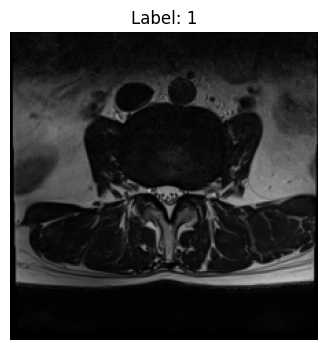

In [ ]:
# Make sure your dataloader exists
if 'Axial T2' in dataloaders: # Check if dataloader for 'Axial T2' exists
    trainloader_t2, valloader_t2 = dataloaders['Axial T2'] # Access dataloaders from dictionary
    len_train_t2, len_val_t2 = lengths['Axial T2'] # Access lengths from dictionary
else:
    print("Dataloader for 'Axial T2' not found.") # Handle case where dataloader was not created
    trainloader_t2, valloader_t2, len_train_t2, len_val_t2 = None, None, 0, 0 # Assign None/0 to prevent further errors

# Get a batch of images and labels
if trainloader_t2 is not None: # Check if trainloader_t2 was successfully obtained
    images, labels = next(iter(trainloader_t2))

    # Take one sample (e.g., the 2nd image in the batch)
    sample = images[1].permute(1, 2, 0)  # Convert CxHxW → HxWxC

    # Plot the sample
    plt.figure(figsize=(8, 4))
    plt.imshow(sample, cmap='gray')
    plt.title(f"Label: {labels[1].item()}")
    plt.axis('off')
    plt.show()
else:
    print("Cannot get a batch as trainloader_t2 is not available.")

In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models
from torchvision import transforms
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
import pandas as pd
from tqdm import tqdm

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
model = models.efficientnet_v2_s(weights=None)

In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models

class CustomEfficientNetV2(nn.Module):
    def __init__(self, num_classes=3, pretrained_weights=None):
        super(CustomEfficientNetV2, self).__init__()
        self.model = models.efficientnet_v2_s(weights=None)
        if pretrained_weights:
            self.model.load_state_dict(torch.load(pretrained_weights))
        num_ftrs = self.model.classifier[-1].in_features
        self.model.classifier[-1] = nn.Linear(num_ftrs, num_classes)

    def forward(self, x):
        return self.model(x)

    def unfreeze_model(self):
        # Unfreeze the last 20 layers, keeping BatchNorm layers frozen
        for layer in list(self.model.features.children())[-20:]:
            if not isinstance(layer, nn.BatchNorm2d):
                for param in layer.parameters():
                    param.requires_grad = True

        # Unfreeze the classifier
        for param in self.model.classifier.parameters():
            param.requires_grad = True

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
# Path to the locally uploaded weights file
weights_path = None

In [ ]:
# Initialize models
sagittal_t1_model = CustomEfficientNetV2(num_classes=3, pretrained_weights=weights_path).to(device)
axial_t2_model = CustomEfficientNetV2(num_classes=3, pretrained_weights=weights_path).to(device)
sagittal_t2stir_model = CustomEfficientNetV2(num_classes=3, pretrained_weights=weights_path).to(device)

In [ ]:
# Optionally freeze initial layers
for param in sagittal_t1_model.model.features.parameters():
    param.requires_grad = False
for param in axial_t2_model.model.features.parameters():
    param.requires_grad = False
for param in sagittal_t2stir_model.model.features.parameters():
    param.requires_grad = False

# Unfreeze the final fully connected layer
for param in sagittal_t1_model.model.classifier.parameters():
    param.requires_grad = True
for param in axial_t2_model.model.classifier.parameters():
    param.requires_grad = True
for param in sagittal_t2stir_model.model.classifier.parameters():
    param.requires_grad = True

In [ ]:
# Training parameters
criterion = nn.CrossEntropyLoss()

# Initialize separate optimizers for each model
optimizer_sagittal_t1 = torch.optim.Adam(sagittal_t1_model.model.classifier.parameters(), lr=0.001)
optimizer_axial_t2 = torch.optim.Adam(axial_t2_model.model.classifier.parameters(), lr=0.001)
optimizer_sagittal_t2stir = torch.optim.Adam(sagittal_t2stir_model.model.classifier.parameters(), lr=0.001)

In [ ]:
# Store the models and optimizers in dictionaries for easy access
models = {
    'Sagittal T1': sagittal_t1_model,
    'Axial T2': axial_t2_model,
    'Sagittal T2/STIR': sagittal_t2stir_model,
}
optimizers = {
    'Sagittal T1': optimizer_sagittal_t1,
    'Axial T2': optimizer_axial_t2,
    'Sagittal T2/STIR': optimizer_sagittal_t2stir,
}

In [ ]:
# Count trainable parameters
trainable_params = sum(p.numel() for p in sagittal_t1_model.parameters() if p.requires_grad)
print(f"Number of parameters: {trainable_params}")

Number of parameters: 3843


In [ ]:
label_map = {'normal_mild': 0, 'moderate': 1, 'severe': 2}
for images, labels in trainloader_t2:
    # labels = torch.tensor([label_map[label] for label in labels]) # Removed this line
    labels = labels.to(device) # Directly move the labels tensor to device
    print(labels)
    break

tensor([1, 1, 1, 1, 1, 1, 1, 2])


In [ ]:
import torch.optim.lr_scheduler as lr_scheduler
from copy import deepcopy

def train_model(model, trainloader, valloader, len_train, len_val, optimizer, num_epochs=5, patience=3):
    # Learning rate scheduler
    scheduler = lr_scheduler.StepLR(optimizer, step_size=2, gamma=0.1)

    best_val_acc = 0.0
    best_model_wts = deepcopy(model.state_dict())
    counter = 0

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0
        correct_train = 0

        with tqdm(trainloader, unit="batch") as tepoch:
            for images, labels in tepoch:
                # Handle batches that might be None due to collate_fn
                if images is None:
                    continue

                images, labels = images.to(device), labels.to(device)

                optimizer.zero_grad()
                outputs = model(images)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()
                train_loss += loss.item()

                probabilities = torch.softmax(outputs, dim=1)
                _, predicted = torch.max(probabilities, 1)
                correct_train += (predicted == labels).sum().item()

                tepoch.set_postfix(epoch=epoch+1)

        scheduler.step()

        train_loss /= len(trainloader)
        train_acc = 100 * correct_train / len_train

        model.eval()
        val_loss, correct_val = 0, 0
        with torch.no_grad():
            with tqdm(valloader, unit="batch") as vepoch:
                for images, labels in vepoch:
                     # Handle batches that might be None due to collate_fn
                    if images is None:
                        continue
                    images, labels = images.to(device), labels.to(device)
                    outputs = model(images)
                    loss = criterion(outputs, labels)
                    val_loss += loss.item()

                    probabilities = torch.softmax(outputs, dim=1).squeeze(0)
                    _, predicted = torch.max(probabilities, 1)
                    correct_val += (predicted == labels).sum().item()

                    vepoch.set_postfix(epoch=epoch+1)

        val_loss /= len(valloader)
        val_acc = 100 * correct_val / len_val

        print(f"Epoch {epoch+1}, Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%")

        # Save the best model and check for early stopping
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            best_model_wts = deepcopy(model.state_dict())
            counter = 0
            torch.save(best_model_wts, f'best_model_{epoch+1}.pth')
        else:
            counter += 1

        # Early stopping
        if counter >= patience:
            print(f"Early stopping triggered after {epoch+1} epochs")
            break

    # Load best model weights
    model.load_state_dict(best_model_wts)
    return model, best_val_acc

In [ ]:
# Training all models
for desc, model in models.items():
    # Access dataloader and lengths from dictionaries using the series description
    if desc in dataloaders and desc in lengths:
        trainloader, valloader = dataloaders[desc]
        len_train, len_val = lengths[desc]
    else:
        print(f"Skipping training for {desc} as dataloader was not created.")
        continue # Skip to the next iteration if dataloader is not available

    print(f"Training model for {desc}")
    train_model(model, trainloader, valloader, len_train, len_val, optimizers[desc])

Training model for Sagittal T1


100%|██████████| 109/109 [01:45<00:00,  1.03batch/s, epoch=1]


Epoch 1, Train Loss: 0.5125, Train Acc: 81.46%, Val Loss: 0.5036, Val Acc: 80.41%


100%|██████████| 109/109 [01:46<00:00,  1.02batch/s, epoch=2]


Epoch 2, Train Loss: 0.4941, Train Acc: 81.55%, Val Loss: 0.4722, Val Acc: 82.14%


100%|██████████| 109/109 [01:46<00:00,  1.03batch/s, epoch=3]


Epoch 3, Train Loss: 0.4754, Train Acc: 82.04%, Val Loss: 0.4757, Val Acc: 82.14%


100%|██████████| 109/109 [01:47<00:00,  1.01batch/s, epoch=4]


Epoch 4, Train Loss: 0.4798, Train Acc: 82.09%, Val Loss: 0.4742, Val Acc: 82.14%


100%|██████████| 109/109 [01:46<00:00,  1.02batch/s, epoch=5]


Epoch 5, Train Loss: 0.4747, Train Acc: 82.09%, Val Loss: 0.4734, Val Acc: 82.14%
Early stopping triggered after 5 epochs
Training model for Axial T2


100%|██████████| 138/138 [02:13<00:00,  1.03batch/s, epoch=1]


Epoch 1, Train Loss: 0.6739, Train Acc: 65.45%, Val Loss: 0.6599, Val Acc: 64.18%


100%|██████████| 138/138 [02:11<00:00,  1.05batch/s, epoch=2]


Epoch 2, Train Loss: 0.6640, Train Acc: 65.70%, Val Loss: 0.7276, Val Acc: 61.73%


100%|██████████| 138/138 [02:17<00:00,  1.00batch/s, epoch=3]


Epoch 3, Train Loss: 0.6527, Train Acc: 65.56%, Val Loss: 0.6369, Val Acc: 66.55%


100%|██████████| 138/138 [02:09<00:00,  1.06batch/s, epoch=4]


Epoch 4, Train Loss: 0.6446, Train Acc: 65.99%, Val Loss: 0.6392, Val Acc: 66.55%


100%|██████████| 138/138 [02:10<00:00,  1.06batch/s, epoch=5]


Epoch 5, Train Loss: 0.6377, Train Acc: 66.45%, Val Loss: 0.6372, Val Acc: 66.45%
Training model for Sagittal T2/STIR


100%|██████████| 30/30 [00:29<00:00,  1.03batch/s, epoch=1]


Epoch 1, Train Loss: 0.7612, Train Acc: 56.83%, Val Loss: 0.6919, Val Acc: 60.83%


100%|██████████| 30/30 [00:27<00:00,  1.10batch/s, epoch=2]


Epoch 2, Train Loss: 0.7089, Train Acc: 57.46%, Val Loss: 0.6814, Val Acc: 60.83%


 93%|█████████▎| 28/30 [00:25<00:01,  1.03batch/s, epoch=3]

Let's check the distribution of severity labels and series descriptions in the `train_data` DataFrame to understand why no valid training data is being found.

In [ ]:
print("Value counts for 'severity' in train_data:")
print(train_data['severity'].value_counts(dropna=False))

print("\nValue counts for 'series_description' in train_data:")
print(train_data['series_description'].value_counts(dropna=False))

print("\nValue counts for 'severity' and 'series_description' combined in train_data:")
print(train_data.groupby('series_description')['severity'].value_counts(dropna=False))

Value counts for 'severity' in train_data:
severity
moderate    7950
severe      3081
Name: count, dtype: int64

Value counts for 'series_description' in train_data:
series_description
Axial T2            5496
Sagittal T1         4336
Sagittal T2/STIR    1199
Name: count, dtype: int64

Value counts for 'severity' and 'series_description' combined in train_data:
series_description  severity
Axial T2            moderate    3659
                    severe      1837
Sagittal T1         moderate    3560
                    severe       776
Sagittal T2/STIR    moderate     731
                    severe       468
Name: count, dtype: int64


In [ ]:
# Ensure train_data is defined before use
if 'train_data' not in globals():
    import pandas as pd
    # Assuming final_merged_df is available from previous steps
    if 'final_merged_df' in globals():
        train_data = final_merged_df.copy()
    else:
        print("Error: final_merged_df is not defined. Please run previous cells.")
        train_data = pd.DataFrame() # Create an empty DataFrame to avoid further errors